In [1]:
import braidz_analysis as bz
import matplotlib.pyplot as plt
from matplotlib import gridspec
import pandas as pd
import numpy as np
from scipy.signal import find_peaks
import seaborn as sns
from tqdm import tqdm
import scipy
from scipy import signal
from scipy.signal import savgol_filter
from scipy.stats import gaussian_kde

import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
import matplotlib.font_manager as fm
import seaborn as sns

base_folder = r"/Volumes/New Volume/Braidz Files"
cm2inch = 1 / 2.54

2025-03-04 10:44:08,227 [INFO] 
Limited Linear Model Support Detected! 
---> PYCHEBFUN is not installed. 
---> Install pychebfun to use chebfun derivatives (https://github.com/pychebfun/pychebfun/) 
You can still use other methods 



In [2]:
J89_raw_data = bz.braidz.read_braidz(["20250219_142405.braidz", "20250222_141400.braidz", "20250224_143336.braidz"], base_folder)

In [3]:
J89_opto_data = bz.processing.get_stim_or_opto_data(J89_raw_data["df"], J89_raw_data["opto"], type="opto")

100%|██████████| 1934/1934 [00:43<00:00, 44.21it/s]


In [4]:
J89_opto_data_filtered = bz.filtering.filter_data_dict(
    J89_opto_data,
    (J89_opto_data["frames_in_radius"] >= 15) & (J89_opto_data["sham"] == 0)
)

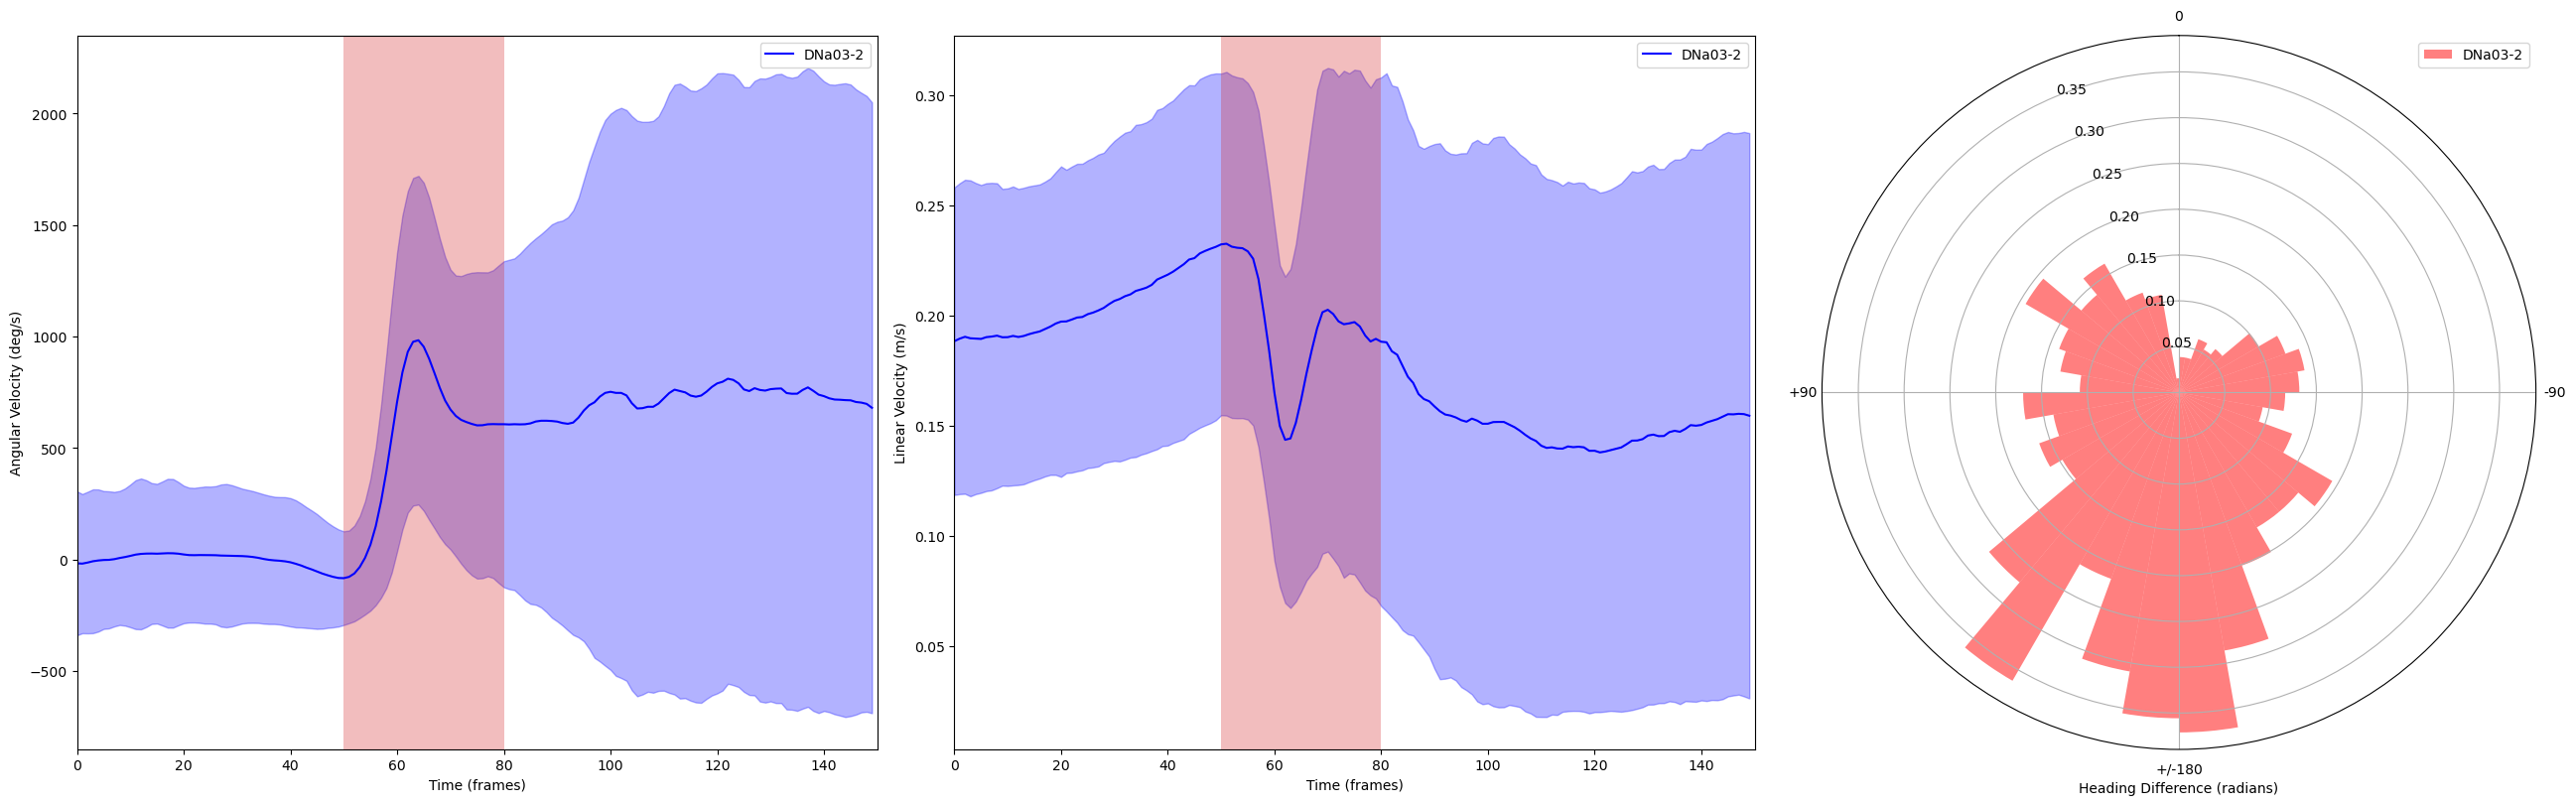

In [6]:
fig = plt.figure(figsize=(26, 8), constrained_layout=True)

# Angular velocity
ax1 = fig.add_subplot(1, 3, 1)
bz.plotting.plot_angular_velocity(
    J89_opto_data_filtered,
    ax = ax1,
    use_abs=True,
    baseline_range=[0, 50],
    shaded_region=[50, 80],
    convert_to_degrees=True,
    color = "blue",
    label = "DNa03-2"

)

ax1.legend(loc="best")


# Linear velocity
ax2 = fig.add_subplot(1, 3, 2)
bz.plotting.plot_linear_velocity(
    J89_opto_data_filtered,
    ax = ax2,
    color = "blue",
    label = "DNa03-2"
)

ax2.legend(loc="best")


# Heading difference
ax3 = fig.add_subplot(1, 3, 3, projection='polar')
bz.plotting.plot_heading_difference(J89_opto_data_filtered, ax=ax3, convert_to_degrees=False, density=True, color="red", label="DNa03-2", alpha=0.5)

ax3.legend(loc="best")

# Set 0 so it's pointing "North"
ax3.set_theta_zero_location("N")
ax3.set_xticks([0, np.pi/2, np.pi, 3*np.pi/2])
ax3.set_xticklabels(["0", "+90", "+/-180", "-90"])
ax3.set_ylabel("")
plt.show()

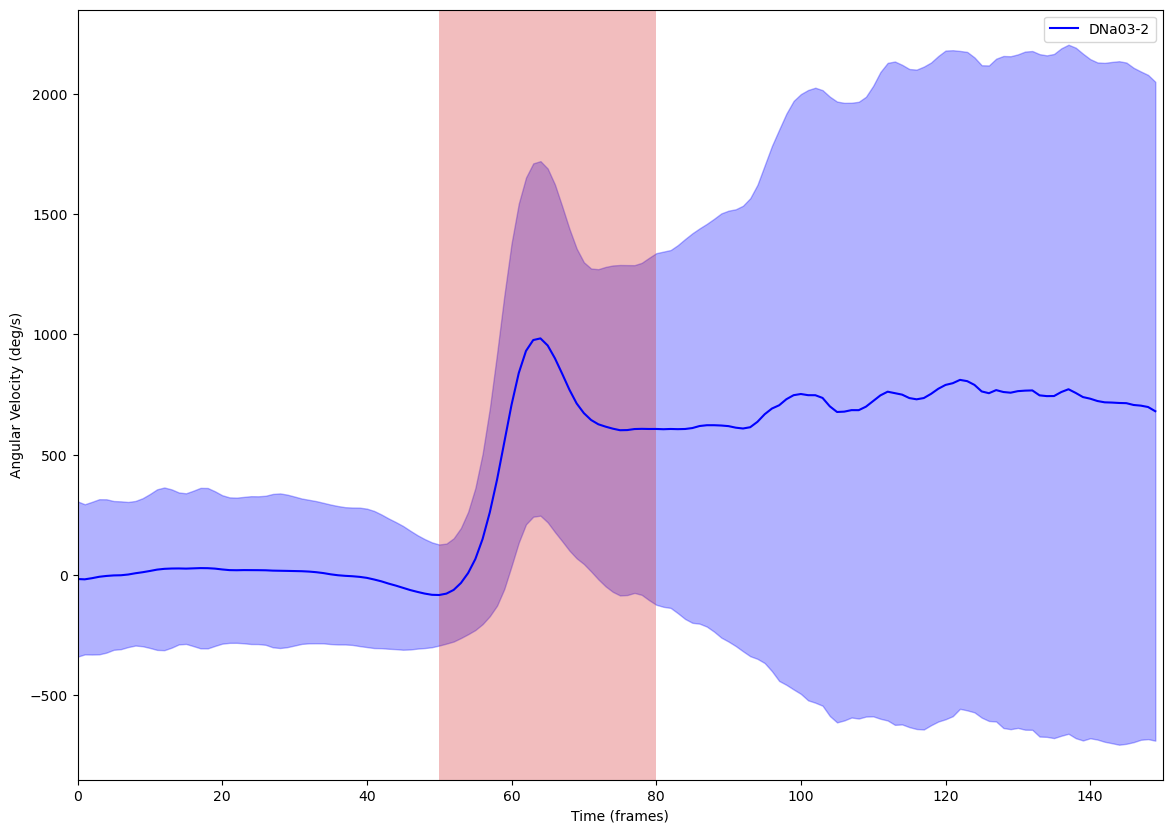

In [7]:
fig = plt.figure(figsize=(14, 10), constrained_layout=False)

# Angular velocity
ax = fig.add_subplot()
bz.plotting.plot_angular_velocity(
    J89_opto_data_filtered,
    ax = ax,
    use_abs=True,
    baseline_range=[0, 50],
    shaded_region=[50, 80],
    convert_to_degrees=True,
    color = "blue",
    label = "DNa03-2"

)

ax.legend(loc="best")
plt.show()


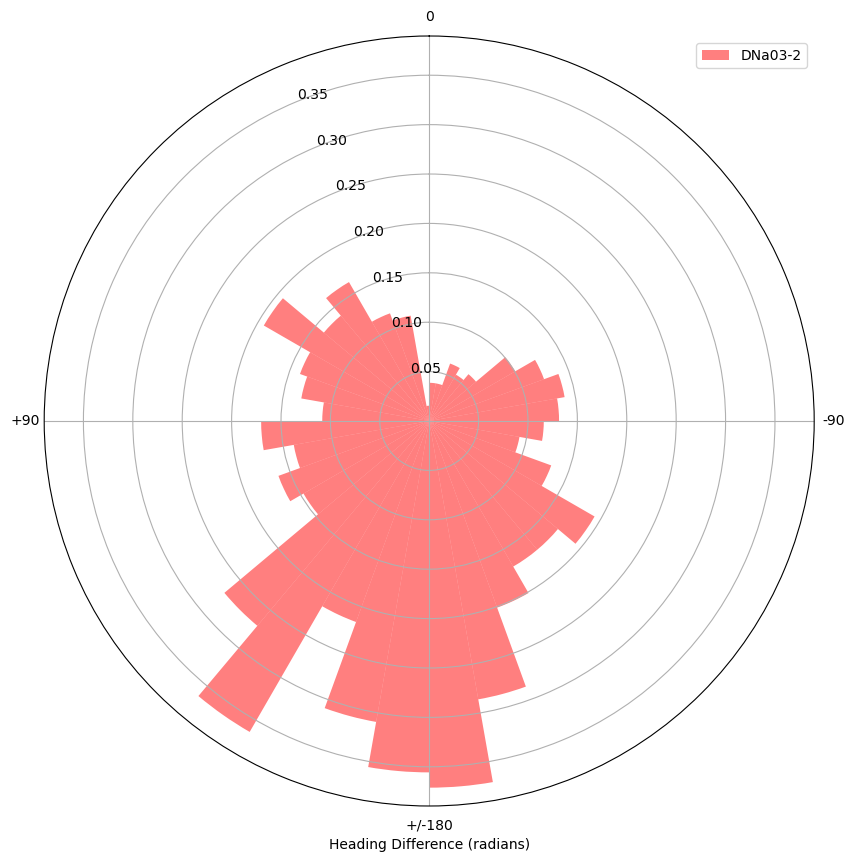

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Define figure size (width, height in inches)
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(14, 10))  # Adjust size as needed

bz.plotting.plot_heading_difference(J89_opto_data_filtered, ax=ax, convert_to_degrees=False, density=True, color="red", label="DNa03-2", alpha=0.5)

ax.legend(loc="best")

# Set 0 so it's pointing "North"
ax.set_theta_zero_location("N")
ax.set_xticks([0, np.pi/2, np.pi, 3*np.pi/2])
ax.set_xticklabels(["0", "+90", "+/-180", "-90"])
ax.set_ylabel("")

plt.show()

In [8]:
J89_First_Repeat = bz.braidz.read_braidz(["20250219_142405.braidz"], base_folder)
J89_Second_Repeat = bz.braidz.read_braidz(["20250222_141400.braidz"], base_folder)
J89_Third_Repeat = bz.braidz.read_braidz(["20250224_143336.braidz"], base_folder)


In [9]:
J89_First_Repeatoptodata = bz.processing.get_stim_or_opto_data(J89_First_Repeat["df"], J89_First_Repeat["opto"], type="opto")
J89_Second_Repeatoptodata = bz.processing.get_stim_or_opto_data(J89_Second_Repeat["df"], J89_Second_Repeat["opto"], type="opto")
J89_Third_Repeatoptodata = bz.processing.get_stim_or_opto_data(J89_Third_Repeat["df"], J89_Third_Repeat["opto"], type="opto")

100%|██████████| 662/662 [00:05<00:00, 120.39it/s]


In [11]:
J891_opto_data_filtered = bz.filtering.filter_data_dict(
    J89_First_Repeatoptodata,
    (J89_First_Repeatoptodata["frames_in_radius"] >= 15) & (J89_First_Repeatoptodata["sham"] == 0)
)

J892_opto_data_filtered = bz.filtering.filter_data_dict(
    J89_Second_Repeatoptodata,
    (J89_Second_Repeatoptodata["frames_in_radius"] >= 15) & (J89_Second_Repeatoptodata["sham"] == 0)
)

J893_opto_data_filtered = bz.filtering.filter_data_dict(
    J89_Third_Repeatoptodata,
    (J89_Third_Repeatoptodata["frames_in_radius"] >= 15) & (J89_Third_Repeatoptodata["sham"] == 0)
)

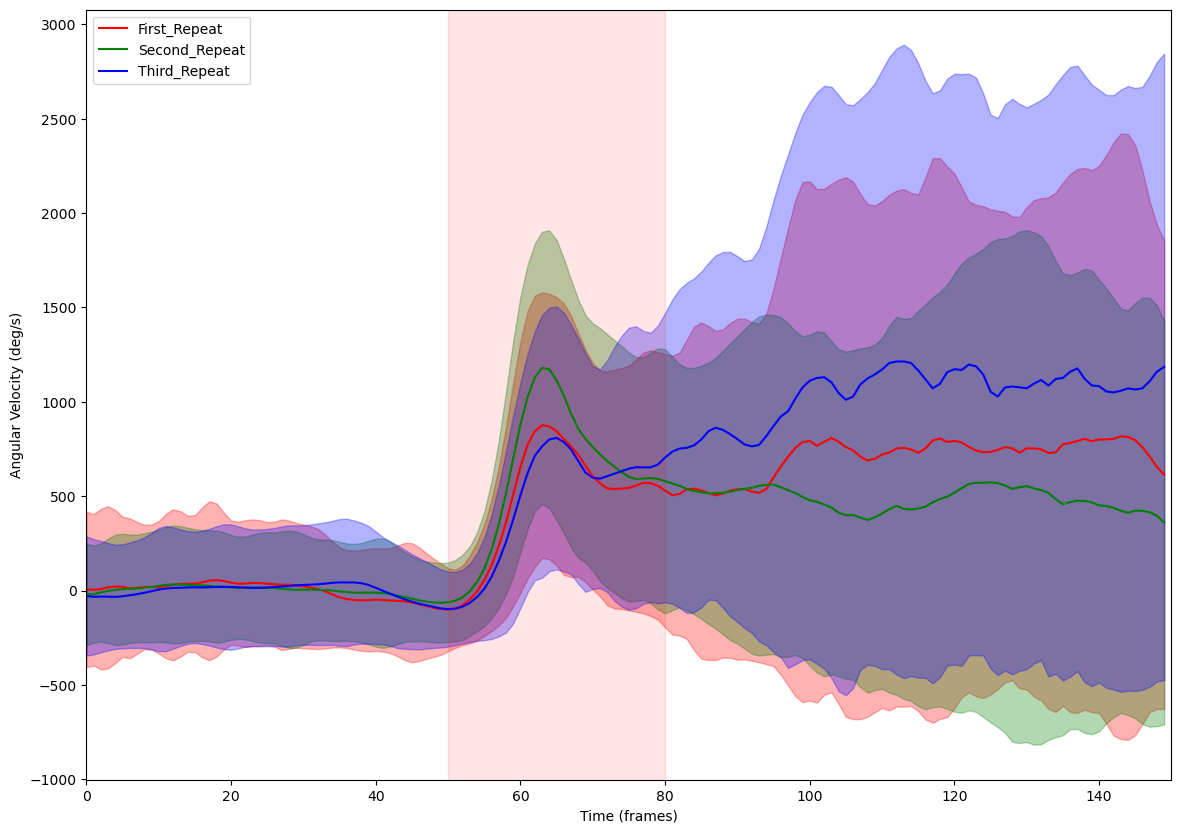

In [12]:
# Create a single figure and axis
fig, ax = plt.subplots(figsize=(14, 10))

# Plot all data on the same axis
bz.plotting.plot_angular_velocity(
    J891_opto_data_filtered,
    ax=ax,
    use_abs=True,
    baseline_range=[0, 50],
    shaded_region=None,
    color="red",
    convert_to_degrees=True,
    label="First_Repeat"
)

bz.plotting.plot_angular_velocity(
    J892_opto_data_filtered,
    ax=ax,
    use_abs=True,
    baseline_range=[0, 50],
    shaded_region=None,
    color="green",
    convert_to_degrees=True,
    label="Second_Repeat"
)


bz.plotting.plot_angular_velocity(
    J893_opto_data_filtered,
    ax=ax,
    use_abs=True,
    baseline_range=[0, 50],
    shaded_region=None,
    color="blue",
    convert_to_degrees=True,
    label="Third_Repeat"
)


ax.axvspan(50, 80, color='red', alpha= 0.1)

# Add legend and show plot
ax.legend(loc="best")
plt.show()


In [2]:
J89_raw_data = bz.braidz.read_braidz([ "20250222_141400.braidz"], base_folder)

In [3]:
J89_opto_data = bz.processing.get_stim_or_opto_data(J89_raw_data["df"], J89_raw_data["opto"], type="opto")

100%|██████████| 688/688 [00:05<00:00, 115.68it/s]


In [5]:
J89_opto_data.keys()

dict_keys(['timestamp', 'angular_velocity', 'linear_velocity', 'position', 'heading_difference', 'frames_in_radius', 'pre_saccade_amplitude', 'pre_saccade_distance_from_stim_idx', 'sham', 'intensity', 'duration', 'frequency', 'responsive'])

In [9]:
position_values = J89_opto_data["position"]


In [10]:
import numpy as np

# Assuming position_values is a NumPy array
print("Shape of the dataset:", position_values.shape)


Shape of the dataset: (501, 150, 3)


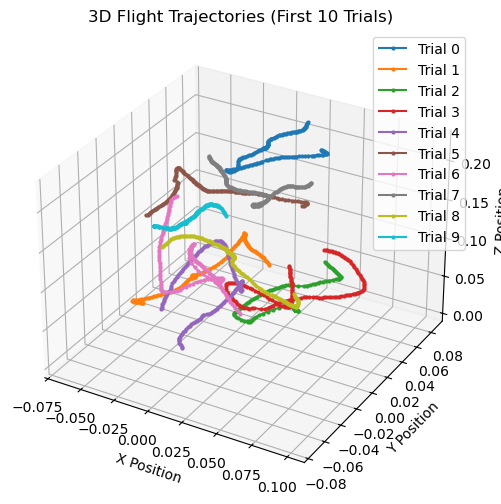

In [17]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

num_trials_to_plot = 10 # Adjust as needed

for i in range(num_trials_to_plot):
    x, y, z = position_values[i, :, 0], position_values[i, :, 1], position_values[i, :, 2]
    ax.plot(x, y, z, marker='o', linestyle='-', markersize=2, label=f"Trial {i}")

# Labels
ax.set_xlabel("X Position")
ax.set_ylabel("Y Position")
ax.set_zlabel("Z Position")
ax.set_title(f"3D Flight Trajectories (First {num_trials_to_plot} Trials)")
ax.legend()
plt.show()


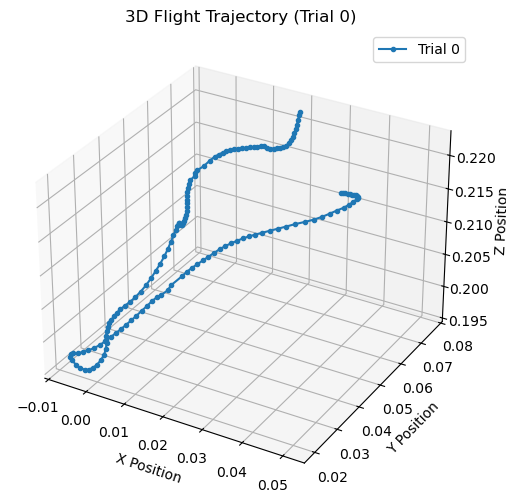

In [12]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Select one trial (e.g., first trial)
trial_index = 0  # Change this to visualize different trials
x, y, z = position_values[trial_index, :, 0], position_values[trial_index, :, 1], position_values[trial_index, :, 2]

# Plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot(x, y, z, marker='o', linestyle='-', markersize=3, label=f"Trial {trial_index}")

# Labels
ax.set_xlabel("X Position")
ax.set_ylabel("Y Position")
ax.set_zlabel("Z Position")
ax.set_title(f"3D Flight Trajectory (Trial {trial_index})")
ax.legend()
plt.show()


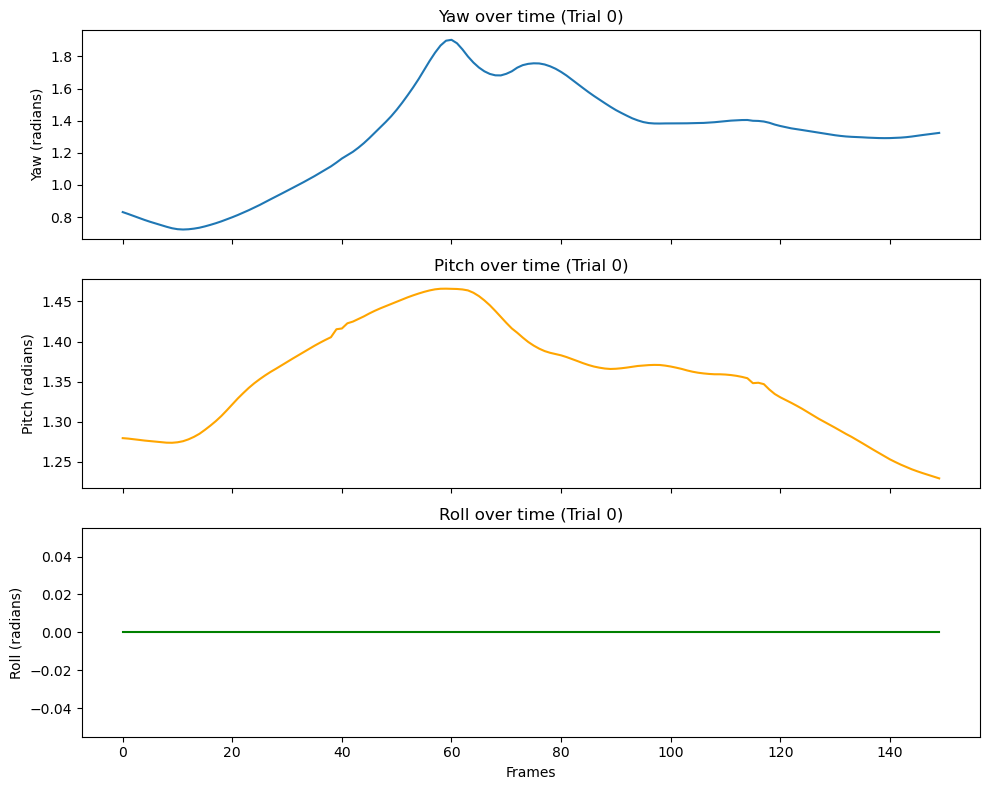

In [15]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_yaw_pitch_roll(position_data):
    # Assuming position_data shape (150, 3), where columns represent x, y, z
    # Calculate yaw, pitch based on changes in position
    
    yaw = np.arctan2(position_data[:, 1], position_data[:, 0])  # Angle in XY plane (degrees)
    pitch = np.arctan2(position_data[:, 2], np.sqrt(position_data[:, 0]**2 + position_data[:, 1]**2))  # Angle with Z axis

    # Roll calculation requires angular velocity or orientation data; we'll omit for now
    roll = np.zeros_like(yaw)  # Placeholder (set to zero if no roll data is available)
    
    return yaw, pitch, roll

# Select one trial (e.g., first trial)
trial_index = 0
position_data = position_values[trial_index, :, :]

yaw, pitch, roll = calculate_yaw_pitch_roll(position_data)

# Plot Yaw, Pitch, and Roll over time (frames)
fig, axs = plt.subplots(3, 1, figsize=(10, 8), sharex=True)

# Yaw Plot
axs[0].plot(yaw, label="Yaw")
axs[0].set_ylabel("Yaw (radians)")
axs[0].set_title(f"Yaw over time (Trial {trial_index})")

# Pitch Plot
axs[1].plot(pitch, label="Pitch", color='orange')
axs[1].set_ylabel("Pitch (radians)")
axs[1].set_title(f"Pitch over time (Trial {trial_index})")

# Roll Plot
axs[2].plot(roll, label="Roll", color='green')
axs[2].set_xlabel("Frames")
axs[2].set_ylabel("Roll (radians)")
axs[2].set_title(f"Roll over time (Trial {trial_index})")

plt.tight_layout()
plt.show()


In [16]:
angular_velocity = J89_opto_data["angular_velocity"]

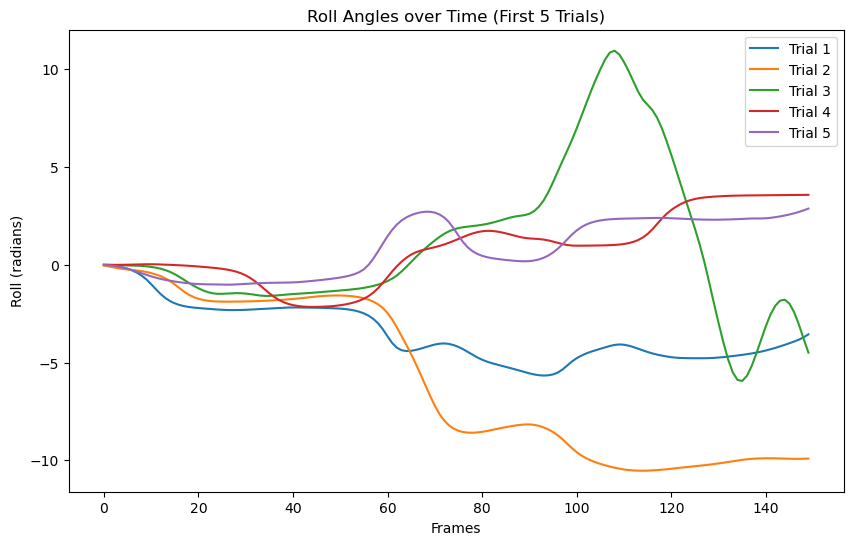

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# Time step for 100 frames per second
dt = 0.01  # 1 frame = 0.01 seconds

# Integrate angular velocity over time for all trials
all_rolls = np.cumsum(angular_velocity, axis=1) * dt  # Shape: (501, 150)

# Plot roll angles for a subset of trials (e.g., first 5 trials)
fig, ax = plt.subplots(figsize=(10, 6))

for i in range(5):  # Plot first 5 trials
    ax.plot(all_rolls[i, :], label=f"Trial {i+1}")

ax.set_xlabel("Frames")
ax.set_ylabel("Roll (radians)")
ax.set_title("Roll Angles over Time (First 5 Trials)")
ax.legend()
plt.show()



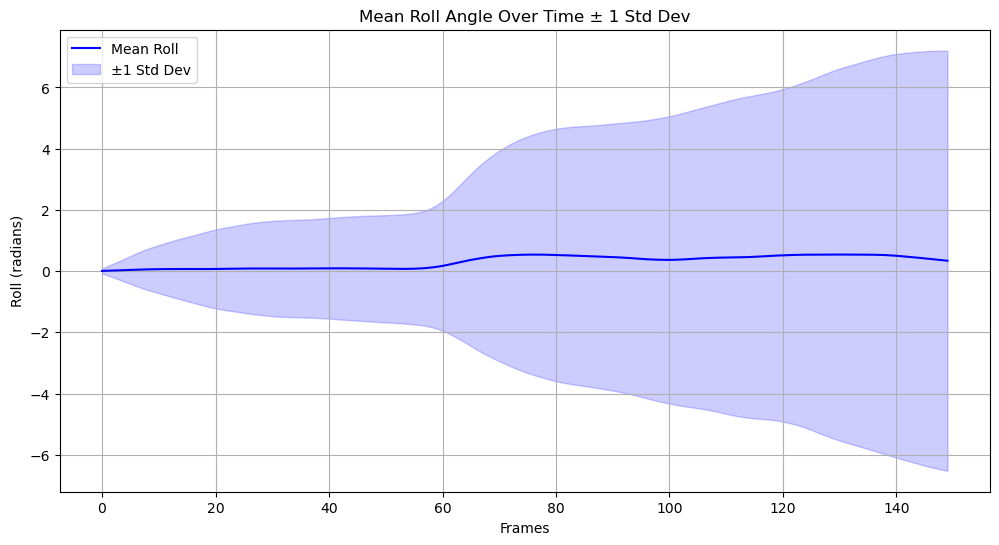

In [28]:
# Compute mean and standard deviation across all trials
mean_roll = np.mean(all_rolls, axis=0)
std_roll = np.std(all_rolls, axis=0)

# Plot mean roll with a shaded region for variability
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(mean_roll, color="blue", label="Mean Roll")
ax.fill_between(range(all_rolls.shape[1]), mean_roll - std_roll, mean_roll + std_roll, 
                color="blue", alpha=0.2, label="±1 Std Dev")

# Labels and title
ax.set_xlabel("Frames")
ax.set_ylabel("Roll (radians)")
ax.set_title("Mean Roll Angle Over Time ± 1 Std Dev")
ax.legend()
ax.grid(True)

plt.show()


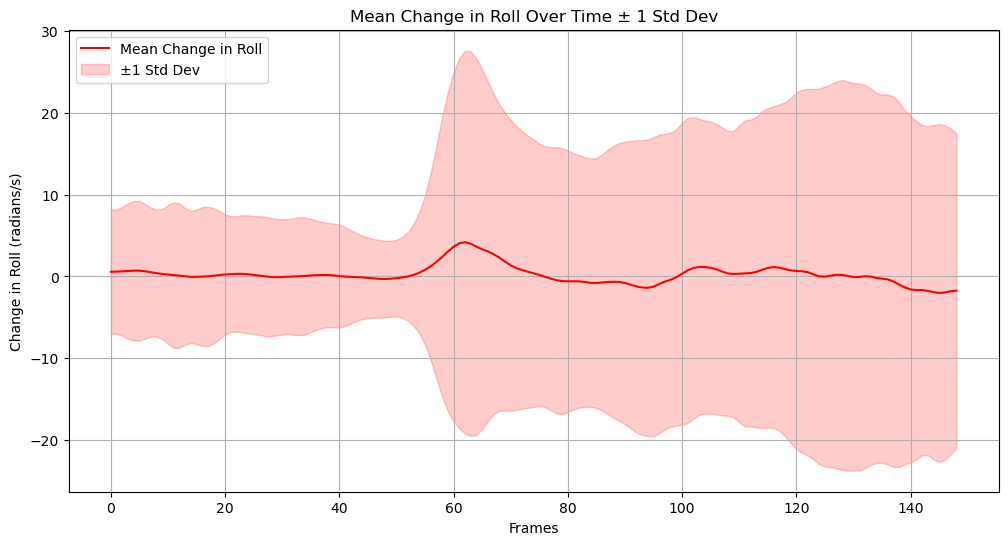

In [29]:
import numpy as np
import matplotlib.pyplot as plt

# Time step for 100 frames per second
dt = 0.01  # 1 frame = 0.01 seconds

# Compute roll from angular velocity
all_rolls = np.cumsum(angular_velocity, axis=1) * dt  # Shape: (501, 150)

# Compute change in roll (derivative)
delta_roll = np.diff(all_rolls, axis=1) / dt  # Shape: (501, 149)

# Compute mean change in roll across trials
mean_delta_roll = np.mean(delta_roll, axis=0)
std_delta_roll = np.std(delta_roll, axis=0)

# Plot mean change in roll with standard deviation
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(mean_delta_roll, color="red", label="Mean Change in Roll")
ax.fill_between(range(len(mean_delta_roll)), mean_delta_roll - std_delta_roll, mean_delta_roll + std_delta_roll, 
                color="red", alpha=0.2, label="±1 Std Dev")

# Labels and title
ax.set_xlabel("Frames")
ax.set_ylabel("Change in Roll (radians/s)")
ax.set_title("Mean Change in Roll Over Time ± 1 Std Dev")
ax.legend()
ax.grid(True)

plt.show()


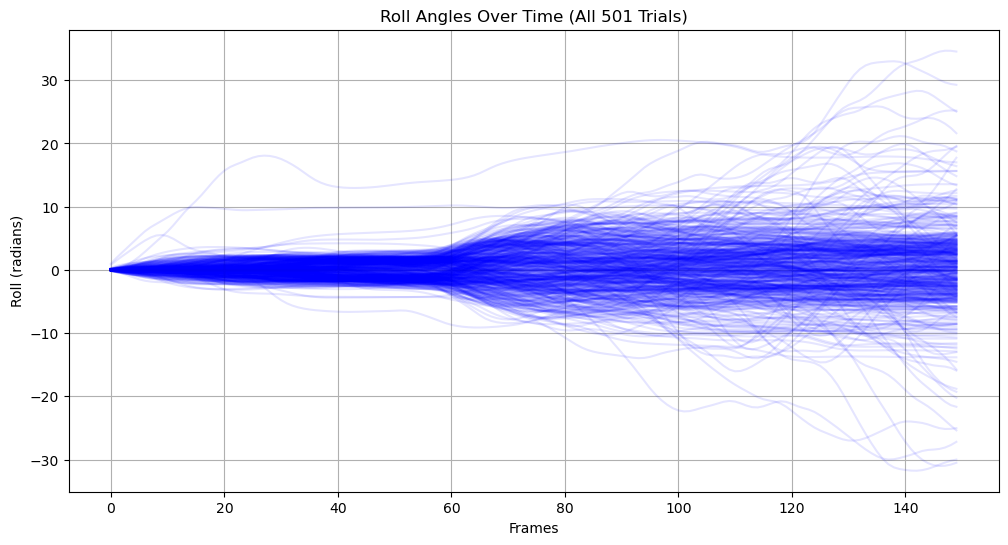

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Time step for 100 frames per second
dt = 0.01  # 1 frame = 0.01 seconds

# Integrate angular velocity over time for all trials
all_rolls = np.cumsum(angular_velocity, axis=1) * dt  # Shape: (501, 150)

# Plot all trials with transparency to reduce clutter
fig, ax = plt.subplots(figsize=(12, 6))

for i in range(all_rolls.shape[0]):  # Loop over all 501 trials
    ax.plot(all_rolls[i, :], color="blue", alpha=0.1)  # Low alpha for transparency

# Add labels and title
ax.set_xlabel("Frames")
ax.set_ylabel("Roll (radians)")
ax.set_title("Roll Angles Over Time (All 501 Trials)")
ax.grid(True)

plt.show()


In [18]:
import numpy as np

# Assuming position_values is a NumPy array
print("Shape of the dataset:", angular_velocity.shape)


Shape of the dataset: (501, 150)


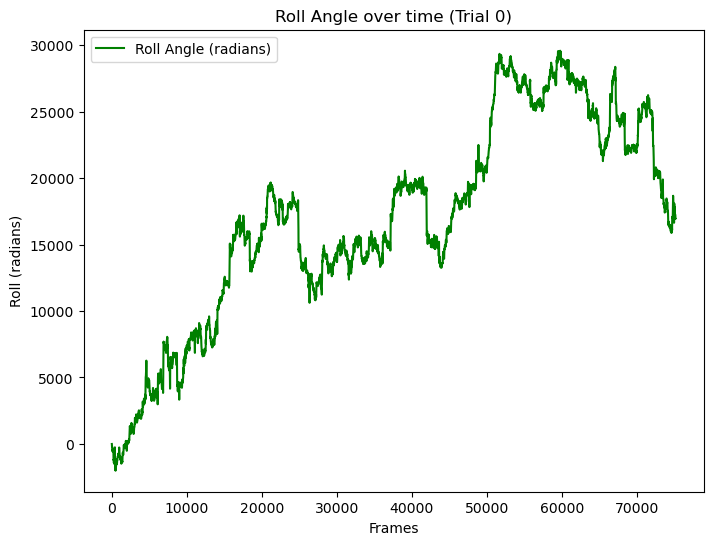

In [19]:
# Time step (assuming uniform, e.g., 1 frame per second or known time step)
dt = 1  # Adjust if time step is known, else use 1 for simplicity

# Integrating angular velocity over time to get roll angle (in radians)
roll = np.cumsum(angular_velocity) * dt  # Simple numerical integration

# Plot Roll angle over time (frames)
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(roll, label="Roll Angle (radians)", color='green')
ax.set_xlabel("Frames")
ax.set_ylabel("Roll (radians)")
ax.set_title(f"Roll Angle over time (Trial {trial_index})")
ax.legend()
plt.show()